<a href="https://colab.research.google.com/github/Rishi210904/Project-1-of-LLM/blob/main/project3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/krajit/LLMs-from-scratch.git

Cloning into 'LLMs-from-scratch'...
remote: Enumerating objects: 4857, done.
remote: Total 4857 (delta 0), reused 0 (delta 0), pack-reused 4857 (from 1)
Receiving objects: 100% (4857/4857), 12.75 MiB | 15.08 MiB/s, done.
Resolving deltas: 100% (3016/3016), done.


In [2]:
%cd /content/LLMs-from-scratch/ch07/01_main-chapter-code

/content/LLMs-from-scratch/ch07/01_main-chapter-code


In [3]:
!pip install datasets
!pip install tiktoken
!pip install safetensors
!pip install llms-from-scratch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.4/491.4 kB 15.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 11.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.6/193.6 kB 19.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 15.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 17.8 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2025.3.2
    Uninstalling fsspec-2025.3.2:
      Successfully uninstalled fsspec-2025.3.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.6.0+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cuda-cupti-cu12==12.4.127; platform_system 

In [4]:
import torch
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
import pandas as pd
import tiktoken
from llms_from_scratch.ch04 import GPTModel
from llms_from_scratch.ch05 import generate, text_to_token_ids, token_ids_to_text
from llms_from_scratch.ch05 import calc_loss_loader, train_model_simple, calc_loss_batch

In [5]:
from importlib.metadata import version

pkgs = ["numpy", "torch", "safetensors"]
for p in pkgs:
    print(f"{p} version: {version(p)}")

numpy version: 2.0.2
torch version: 2.6.0+cu124
safetensors version: 0.5.3


In [6]:
from datasets import load_dataset

ds = load_dataset("open-r1/OpenR1-Math-220k")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/5.13k [00:00<?, ?B/s]

Resolving data files:   0%|          | 0/20 [00:00<?, ?it/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


train-00000-of-00010.parquet:   0%|          | 0.00/214M [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


0001.parquet:   0%|          | 0.00/215M [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


train-00002-of-00010.parquet:   0%|          | 0.00/215M [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


train-00003-of-00010.parquet:   0%|          | 0.00/217M [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


train-00004-of-00010.parquet:   0%|          | 0.00/215M [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


train-00005-of-00010.parquet:   0%|          | 0.00/214M [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


0006.parquet:   0%|          | 0.00/216M [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


0007.parquet:   0%|          | 0.00/216M [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


train-00008-of-00010.parquet:   0%|          | 0.00/214M [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


train-00009-of-00010.parquet:   0%|          | 0.00/215M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/93733 [00:00<?, ? examples/s]

In [7]:
df = ds["train"].to_pandas()

In [8]:
df_shuffled = df.sample(frac=1, random_state=42).reset_index(drop=True)

In [9]:
train_size = 500
test_size = 50
val_size = 100

train_df = df_shuffled.iloc[:train_size]
test_df = df_shuffled.iloc[train_size:train_size + test_size]
val_df = df_shuffled.iloc[train_size + test_size:train_size + test_size + val_size]

In [10]:
train_df.head()

,problem,solution,answer,problem_type,question_type,source,uuid,is_reasoning_complete,generations,correctness_math_verify,correctness_llama,finish_reasons,correctness_count,messages
0,Example 4 Find the smallest positive integer $...,"First, construct an integer sequence $a_{1}, a...",1018,Combinatorics,math-word-problem,cn_contest,e9a0a5b0-89e0-52e8-bd35-836057f9c41f,"[True, True]","[<think>\nAlright, let's try to tackle this pr...","[False, True]",None,None,1,[{'content': 'Example 4 Find the smallest posi...
1,15 Let the quadratic function $f(x)=a x^{2}+b ...,"Analyze: First, derive the analytical expressi...",9,Algebra,math-word-problem,olympiads,ba96b583-0794-5f1f-9994-d3784f45f87c,"[True, True]","[<think>\nOkay, so I need to solve this quadra...","[True, True]",None,None,2,[{'content': '15 Let the quadratic function $f...
2,"7・91 Let $f(x)=a x^{4}-b x^{2}+x+5$, and $f(-3...",$$\n\begin{aligned}\n\text { [Solution] } \qua...,8,Algebra,MCQ,olympiads,9d629e9d-2829-5d37-94f5-70c88e5ad200,"[True, True]","[<think>\nOkay, so I have this problem here: \...","[False, False]","[True, False]",None,1,[{'content': '7・91 Let $f(x)=a x^{4}-b x^{2}+x...
3,"The sides of a triangle have lengths $a, a+2$,...",As the sum of the lengths of the smaller sides...,>3,Geometry,math-word-problem,olympiads,bb4a43f6-774e-55f5-8fbd-535f958c50ce,"[True, True]","[<think>\nOkay, so I need to figure out all po...","[False, False]","[True, True]",None,2,[{'content': 'The sides of a triangle have len...
4,## Task 1 - 310831\n\nA box $B$ is filled with...,For the quantities $b$ and $r$ of blue and red...,"b=1785,r=1575",Number Theory,math-word-problem,olympiads,adc25fd4-783a-5b9c-bd0d-4958283ba85d,"[True, True]","[<think>\nOkay, let me try to work through thi...","[False, False]","[True, False]",None,1,[{'content': '## Task 1 - 310831 A box $B$ is...


In [11]:
train_df.describe()

,correctness_count
count,500.000000
mean,1.788000
std,0.572461
min,1.000000
25%,1.000000
50%,2.000000
75%,2.000000
max,4.000000


In [12]:
test_df.describe()

,correctness_count
count,50.000000
mean,1.940000
std,0.739829
min,1.000000
25%,2.000000
50%,2.000000
75%,2.000000
max,4.000000


In [13]:
val_df.describe()

,correctness_count
count,100.000000
mean,1.770000
std,0.509605
min,1.000000
25%,1.000000
50%,2.000000
75%,2.000000
max,4.000000


In [14]:
import json
import numpy as np

'''
The orient="records" option in pandas.DataFrame.to_dict()
converts a DataFrame into a list of dictionaries, where each row becomes one dictionary,
and each column name becomes a key in that dictionary.
'''
train_data = train_df.to_dict(orient="records")
val_data = val_df.to_dict(orient="records")
test_data = test_df.to_dict(orient="records")

# Define a custom function to handle NumPy arrays
def default_numpy(obj):
    if isinstance(obj, np.ndarray):
        return obj.tolist()
    raise TypeError(f'Object of type {obj.__class__.__name__} is not JSON serializable')

with open("train.json", "w", encoding="utf-8") as f:
  json.dump(train_data, f, ensure_ascii=False, indent=2, default=default_numpy) # Use default to handle numpy arrays

with open("validation.json", "w", encoding="utf-8") as f:
    json.dump(val_data, f, ensure_ascii=False, indent = 2, default=default_numpy) # Use default to handle numpy arrays

with open("test.json", "w", encoding="utf-8") as f:
        json.dump(test_data, f, ensure_ascii=False, indent=2, default=default_numpy) # Use default to handle numpy arrays

In [15]:
for k in range(0,5):

    for key in train_data[k]:
        print(key, ":",train_data[k][key] )
    print("====")

problem : Example 4 Find the smallest positive integer $n$, such that for any sequence of $n$ positive integers $a_{1}, a_{2}, \cdots, a_{n}$ satisfying $\sum_{i=1}^{n} a_{i}=2007$, there must be a sum of some consecutive terms equal to 30.
(Fourth China Southeast Mathematical Olympiad)
solution : First, construct an integer sequence $a_{1}, a_{2}, \cdots, a_{1017}$ with 1017 terms, such that no consecutive terms sum to 30. For this, take
$$
a_{1}=a_{2}=\cdots=a_{29}=1, a_{30}=31,
$$

and $a_{30 m+i}=a_{i}(i=1,2, \cdots, 30, m \in \mathbf{N})$.
Thus, $\left\{a_{k}\right\}$ is:
$$
\begin{array}{l}
1,1, \cdots, 1,31 ; 1,1, \cdots, 1,31 ; \cdots ; \\
1,1, \cdots, 1,31 ; 1,1, \cdots, 1
\end{array}
$$
(There are 34 segments, the first 33 segments each have 30 terms, and the last segment has 27 terms, totaling 1017 terms).

Second, when the number of terms is less than 1017, it is sufficient to merge some consecutive numbers in certain segments into larger numbers.

For any positive integer 

In [16]:
def format_input(entry):
    instruction_text = (
        "Below is a math problem. Write a detailed solution that explains each step clearly."
        "\n\n### Problem:\n" + entry["problem"]
    )

    # Optional: Include the final answer if you want the model to derive the same
    # You can remove this part if you're just prompting for the full solution.
    answer_text = f"\n\n### Expected Answer:\n{entry['answer']}" if "answer" in entry and entry["answer"] else ""

    return instruction_text + answer_text

In [17]:
import torch
from torch.utils.data import Dataset

class InstructionDataset(Dataset):
    def __init__(self, data, tokenizer):
        self.data = data

        # Pre-tokenize texts
        self.encoded_texts = []
        for entry in data:
            instruction_plus_input = format_input(entry)
            response_text = f"\n\n### Response:\n{entry['solution']}"
            full_text = instruction_plus_input + response_text
            self.encoded_texts.append(
                tokenizer.encode(full_text)
            )
    def __getitem__(self, index):
        return self.encoded_texts[index]

    def __len__(self):
        return len(self.data)

In [18]:
tokenizer = tiktoken.get_encoding("gpt2")
print(tokenizer.encode("<|endoftext|>", allowed_special={"<|endoftext|>"}))

[50256]


In [19]:
def custom_collate_fn(batch, pad_token_id=50256, ignore_index=-100, allowed_max_length=None, device="cpu"):

    # Find the longest sequence in the batch
    batch_max_length = max(len(item)+1 for item in batch)

    # Pad and prepare inputs and targets
    inputs_lst, targets_lst = [], []

    for item in batch:
        new_item = item.copy()
        # Add an <|endoftext|> token
        new_item += [pad_token_id]
        # Pad sequences to max_length
        padded = (
            new_item + [pad_token_id] *
            (batch_max_length - len(new_item))
        )
        inputs = torch.tensor(padded[:-1])  # Truncate the last token for inputs
        targets = torch.tensor(padded[1:])  # Shift +1 to the right for targets

        # New: Replace all but the first padding tokens in targets by ignore_index
        mask = targets == pad_token_id
        indices = torch.nonzero(mask).squeeze()
        if indices.numel() > 1:
            targets[indices[1:]] = ignore_index

        # New: Optionally truncate to maximum sequence length
        if allowed_max_length is not None:
            inputs = inputs[:allowed_max_length]
            targets = targets[:allowed_max_length]

        inputs_lst.append(inputs)
        targets_lst.append(targets)

        inputs_tensor = torch.stack(inputs_lst).to(device)
    targets_tensor = torch.stack(targets_lst).to(device)

    return inputs_tensor, targets_tensor

In [20]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [21]:
from functools import partial

customized_collate_fn = partial(
    custom_collate_fn,
    device=device,
    allowed_max_length=1024
)

In [22]:
from torch.utils.data import DataLoader

num_workers = 0
batch_size = 1
torch.manual_seed(123)

train_dataset = InstructionDataset(train_data, tokenizer)
train_loader = DataLoader(
    train_dataset,
    batch_size=batch_size,
    collate_fn=customized_collate_fn,
    shuffle=True,
    drop_last=True,
    num_workers=num_workers
)

val_dataset = InstructionDataset(val_data, tokenizer)
val_loader = DataLoader(
    val_dataset,
    batch_size=batch_size,
    collate_fn=customized_collate_fn,
    shuffle=False,
    drop_last=False,
    num_workers=num_workers
)

test_dataset = InstructionDataset(test_data, tokenizer)
test_loader = DataLoader(
    test_dataset,
    batch_size=batch_size,
    collate_fn=customized_collate_fn,
    shuffle=False,
    drop_last=False,
    num_workers=num_workers
)

In [23]:
BASE_CONFIG = {
    "vocab_size": 50257,    # Vocabulary size
    "context_length": 1024, # Context length
    "drop_rate": 0.0,       # Dropout rate
    "qkv_bias": True        # Query-key-value bias
}

#this dictionary defines different GPT-2 model variants
model_configs = {
    "gpt2-small (124M)": {"emb_dim": 768, "n_layers": 12, "n_heads": 12},
    "gpt2-medium (355M)": {"emb_dim": 1024, "n_layers": 24, "n_heads": 16},
    "gpt2-large (774M)": {"emb_dim": 1280, "n_layers": 36, "n_heads": 20},
    "gpt2-xl (1558M)": {"emb_dim": 1600, "n_layers": 48, "n_heads": 25},
}

CHOOSE_MODEL = "gpt2-small (124M)" #we choose which model to use.
BASE_CONFIG.update(model_configs[CHOOSE_MODEL])

In [24]:
import os
import urllib.request #for downloading files via HTTP.
from safetensors.torch import load_file #from the safetensors package—efficient and safe model weight loading


#maps the human-readable CHOOSE_MODEL name to the directory used on Hugging Face.
URL_DIR = {
  "gpt2-small (124M)": "gpt2",
  "gpt2-medium (355M)": "gpt2-medium",
  "gpt2-large (774M)": "gpt2-large",
  "gpt2-xl (1558M)": "gpt2-xl"
}

#the Hugging Face URL to the safetensors file for the selected model.
url = f"https://huggingface.co/openai-community/{URL_DIR[CHOOSE_MODEL]}/resolve/main/model.safetensors"
#output_file: local filename for saving the file (e.g., model-gpt2.safetensors).
output_file = f"model-{URL_DIR[CHOOSE_MODEL]}.safetensors"


if not os.path.exists(output_file):
    urllib.request.urlretrieve(url, output_file)

#loads the model weights as a state_dict using the safetensors format.
state_dict = load_file(output_file)

In [25]:
def assign(left, right):
    if left.shape != right.shape:
        raise ValueError(f"Shape mismatch. Left: {left.shape}, Right: {right.shape}")
    return torch.nn.Parameter(right.detach())

In [26]:
def load_weights_into_gpt(gpt, params):
    gpt.pos_emb.weight = assign(gpt.pos_emb.weight, params["wpe.weight"])
    gpt.tok_emb.weight = assign(gpt.tok_emb.weight, params["wte.weight"])

    for b in range(len(gpt.trf_blocks)):
        q_w, k_w, v_w = torch.chunk(
            params[f"h.{b}.attn.c_attn.weight"], 3, axis=-1)
        gpt.trf_blocks[b].att.W_query.weight = assign(
            gpt.trf_blocks[b].att.W_query.weight, q_w.T)
        gpt.trf_blocks[b].att.W_key.weight = assign(
            gpt.trf_blocks[b].att.W_key.weight, k_w.T)
        gpt.trf_blocks[b].att.W_value.weight = assign(
            gpt.trf_blocks[b].att.W_value.weight, v_w.T)
        q_b, k_b, v_b = torch.chunk(
            params[f"h.{b}.attn.c_attn.bias"], 3, axis=-1)
        gpt.trf_blocks[b].att.W_query.bias = assign(
            gpt.trf_blocks[b].att.W_query.bias, q_b)
        gpt.trf_blocks[b].att.W_key.bias = assign(
            gpt.trf_blocks[b].att.W_key.bias, k_b)
        gpt.trf_blocks[b].att.W_value.bias = assign(
            gpt.trf_blocks[b].att.W_value.bias, v_b)

        gpt.trf_blocks[b].att.out_proj.weight = assign(
            gpt.trf_blocks[b].att.out_proj.weight,
            params[f"h.{b}.attn.c_proj.weight"].T)
        gpt.trf_blocks[b].att.out_proj.bias = assign(
            gpt.trf_blocks[b].att.out_proj.bias,
            params[f"h.{b}.attn.c_proj.bias"])

        gpt.trf_blocks[b].ff.layers[0].weight = assign(
            gpt.trf_blocks[b].ff.layers[0].weight,
            params[f"h.{b}.mlp.c_fc.weight"].T)
        gpt.trf_blocks[b].ff.layers[0].bias = assign(
            gpt.trf_blocks[b].ff.layers[0].bias,
            params[f"h.{b}.mlp.c_fc.bias"])
        gpt.trf_blocks[b].ff.layers[2].weight = assign(
            gpt.trf_blocks[b].ff.layers[2].weight,
            params[f"h.{b}.mlp.c_proj.weight"].T)
        gpt.trf_blocks[b].ff.layers[2].bias = assign(
            gpt.trf_blocks[b].ff.layers[2].bias,
            params[f"h.{b}.mlp.c_proj.bias"])

        gpt.trf_blocks[b].norm1.scale = assign(
            gpt.trf_blocks[b].norm1.scale,
            params[f"h.{b}.ln_1.weight"])
        gpt.trf_blocks[b].norm1.shift = assign(
            gpt.trf_blocks[b].norm1.shift,
            params[f"h.{b}.ln_1.bias"])
        gpt.trf_blocks[b].norm2.scale = assign(
            gpt.trf_blocks[b].norm2.scale,
            params[f"h.{b}.ln_2.weight"])
        gpt.trf_blocks[b].norm2.shift = assign(
            gpt.trf_blocks[b].norm2.shift,
            params[f"h.{b}.ln_2.bias"])

    gpt.final_norm.scale = assign(gpt.final_norm.scale, params["ln_f.weight"])
    gpt.final_norm.shift = assign(gpt.final_norm.shift, params["ln_f.bias"])
    gpt.out_head.weight = assign(gpt.out_head.weight, params["wte.weight"])


In [27]:
import torch
from llms_from_scratch.ch04 import GPTModel # Import the GPTModel class
gpt = GPTModel(BASE_CONFIG)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
load_weights_into_gpt(gpt, state_dict)
gpt.to(device);

In [28]:
torch.manual_seed(123)

tokenizer = tiktoken.get_encoding("gpt2")

token_ids = generate(
    model=gpt.to(device),
    idx=text_to_token_ids("Every effort moves", tokenizer).to(device),
    max_new_tokens=30,
    context_size=BASE_CONFIG["context_length"],
    top_k=1,
    temperature=1.0
)

print("Output text:\n", token_ids_to_text(token_ids, tokenizer))

Output text:
 Every effort moves forward, but it's not enough.

"I'm not going to sit here and say, 'I'm not going to do this,'


In [29]:
torch.manual_seed(123)

input_text = format_input(val_data[0])
print(input_text)

Below is a math problem. Write a detailed solution that explains each step clearly.

### Problem:
Let's say a positive integer $ n$ is [i]atresvido[/i] if the set of its divisors (including 1 and $ n$) can be split in in 3 subsets such that the sum of the elements of each is the same. Determine the least number of divisors an atresvido number can have.

### Expected Answer:
16


In [30]:
def calc_loss_loader(data_loader, model, device, num_batches=None):
    total_loss = 0.
    if len(data_loader) == 0:
        return float("nan")

    elif num_batches is None:
        num_batches = len(data_loader)

    else:
        # Reduce the number of batches to match the total number of batches in the data loader
        # if num_batches exceeds the number of batches in the data loader
        num_batches = min(num_batches, len(data_loader))

    for i, (input_batch, target_batch) in enumerate(data_loader):
        if i < num_batches:
            loss = calc_loss_batch(input_batch, target_batch, model, device)
            total_loss += loss.item()
        else:
          break
    return total_loss / num_batches

In [31]:
token_ids = generate(
    model = gpt,
    idx = text_to_token_ids(input_text, tokenizer).to(device),
    max_new_tokens = 35,
    context_size = BASE_CONFIG["context_length"],
    eos_id = 50256,
)
generated_text = token_ids_to_text(token_ids, tokenizer)

In [32]:
response_text = (
    generated_text[len(input_text):]
    .replace("### Response:", "")
    .strip()
)
print(response_text)

### Problem:

Let's say $ n$ is [i]atresvido[/i] if the set of its divisors (including 1


In [33]:
gpt.to(device)

torch.manual_seed(123)

with torch.no_grad():
    train_loss = calc_loss_loader(train_loader, gpt, device, num_batches=5)
    val_loss = calc_loss_loader(val_loader, gpt, device, num_batches=5)

print("Training loss:", train_loss)
print("Validation loss:", val_loss)

Training loss: 2.431974244117737
Validation loss: 2.721310544013977


In [34]:
import time

start_time = time.time()

torch.manual_seed(123)

optimizer = torch.optim.AdamW(gpt.parameters(), lr=0.00005, weight_decay=0.1)

num_epochs = 1

train_losses, val_losses, tokens_seen = train_model_simple(
    gpt, train_loader, val_loader, optimizer, device,
    num_epochs = num_epochs, eval_freq=100, eval_iter=5,
    start_context = format_input(val_data[0]), tokenizer=tokenizer
)

end_time = time.time()
execution_time_minutes = (end_time - start_time) / 60
print(f"Training completed in {execution_time_minutes:.2f} minutes.")

Ep 1 (Step 000000): Train loss 2.916, Val loss 2.640
Ep 1 (Step 000100): Train loss 1.922, Val loss 1.841
Ep 1 (Step 000200): Train loss 1.579, Val loss 1.781
Ep 1 (Step 000300): Train loss 1.682, Val loss 1.746
Ep 1 (Step 000400): Train loss 1.162, Val loss 1.729
Below is a math problem. Write a detailed solution that explains each step clearly.  ### Problem: Let's say a positive integer $ n$ is [i]atresvido[/i] if the set of its divisors (including 1 and $ n$) can be split in in 3 subsets such that the sum of the elements of each is the same. Determine the least number of divisors an atresvido number can have.  ### Expected Answer: 16  ### Response: Let the divisors of the set $a, b, c, d, e, f, g, h, i, j, k, l, m, n, n+1, n+2
Training completed in 1.73 minutes.


In [35]:
import matplotlib.pyplot as plt

def plot_values(epochs_seen, examples_seen, train_values, val_values, label="loss"):
    fig, ax1 = plt.subplots(figsize=(5, 3))

    # Plot training and validation loss against epochs
    ax1.plot(epochs_seen, train_values, label=f"Training {label}")
    ax1.plot(epochs_seen, val_values, linestyle="-.", label=f"Validation {label}")
    ax1.set_xlabel("Epochs")
    ax1.set_ylabel(label.capitalize())
    ax1.legend()

    # Create a second x-axis for examples seen
    ax2 = ax1.twiny()  # Create a second x-axis that shares the same y-axis
    ax2.plot(examples_seen, train_values, alpha=0)  # Invisible plot for aligning ticks
    ax2.set_xlabel("Examples seen")

    fig.tight_layout()  # Adjust layout to make room
    plt.savefig(f"{label}-plot.pdf")
    plt.show()

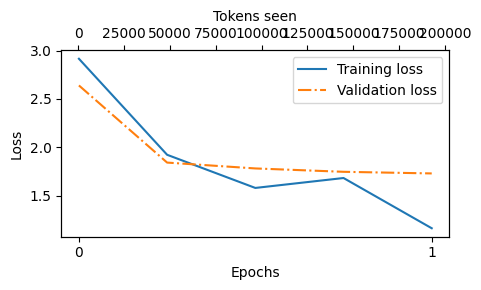

In [37]:
from previous_chapters import plot_losses

epochs_tensor = torch.linspace(0, num_epochs, len(train_losses))
plot_losses(epochs_tensor, tokens_seen, train_losses, val_losses)

In [38]:
torch.manual_seed(123)


for entry in test_data[:3]:

    input_text = format_input(entry)

    token_ids = generate(
        model=gpt,
        idx=text_to_token_ids(input_text, tokenizer).to(device),
        max_new_tokens=256,
        context_size=BASE_CONFIG["context_length"],
        eos_id=50256
    )
    generated_text = token_ids_to_text(token_ids, tokenizer)
    response_text = (
        generated_text[len(input_text):]
        .replace("### Response:", "")
        .strip()
)

    print(input_text)
    print(f"\nCorrect response:\n>> {entry['answer']}")
    print(f"\nModel response:\n>> {response_text.strip()}")
    print("-------------------------------------")

Below is a math problem. Write a detailed solution that explains each step clearly.

### Problem:
9. Given three distinct real numbers $a, b, c$ form a geometric sequence, and $\log _{c} a, \log _{b} c, \log _{a} b$ form an arithmetic sequence with a common difference of $d$. Then $d=$ $\qquad$ .

### Expected Answer:
\frac{3}{2}

Correct response:
>> \frac{3}{2}

Model response:
>> 9. $\log _{c} a, \log _{b} c, \log _{a} b, \log _{c} a, \log _{b} c, \log _{c} a, \log _{b} c, \log _{c} a, \log _{b} c, \log _{c} a, \log _{b} c, \log _{c} a, \log _{b} c, \log _{c} a, \log _{b} c, \log _{c} a, \log _{b} c, \log _{c} a, \log _{b} c, \log _{c} a, \log _{b} c, \log _{c} a, \log _{b} c, \log _{c} a, \log _{b} c, \log _{c} a, \log _{b} c, \log _{c} a, \log _{b} c, \log _{c} a, \log _{b} c,
-------------------------------------
Below is a math problem. Write a detailed solution that explains each step clearly.

### Problem:
3.153. $\sin ^{2} \frac{\pi}{8}+\cos ^{2} \frac{3 \pi}{8}+\sin ^{2} \fr

In [39]:
from tqdm import tqdm
import json
import numpy as np

def default_numpy(obj):
    if isinstance(obj, np.ndarray):
        return obj.tolist()
    raise TypeError(f'Object of type {obj.__class__.__name__} is not JSON serializable')

for i, entry in tqdm(enumerate(test_data), total=len(test_data)):

    input_text = format_input(entry)

    token_ids = generate(
        model=gpt,
        idx=text_to_token_ids(input_text, tokenizer).to(device),
        max_new_tokens=256,
        context_size=BASE_CONFIG["context_length"],
        eos_id=50256
    )
    generated_text = token_ids_to_text(token_ids, tokenizer)
    response_text = generated_text[len(input_text):].replace("### Response:", "").strip()

    test_data[i]["model_response"] = response_text


with open("instruction-data-with-response.json", "w") as file:
    # Use the default parameter to handle numpy arrays
    json.dump(test_data, file, indent=4, default=default_numpy)  # "indent" for pretty-printing

100%|██████████| 50/50 [04:34<00:00,  5.48s/it]


In [40]:
import re


file_name = f"{re.sub(r'[ ()]', '', CHOOSE_MODEL) }-sft.pth"
torch.save(gpt.state_dict(), file_name)
print(f"Model saved as {file_name}")

# Load model via
# model.load_state_dict(torch.load("gpt2-medium355M-sft.pth"))

Model saved as gpt2-small124M-sft.pth
